<a href="https://colab.research.google.com/github/Dilara-Benli/basic_ocr/blob/main/exp_date_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install paddlepaddle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


In [2]:
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 78.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=4bb37a62a8a5c2a728586e541976ca34eaea60030ebdc86ac4dc081a907b6652
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 8.73MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:00<00:00, 16.8MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:00<00:00, 5.17MiB/s]

[2024/09/13 19:06:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

[2024/09/13 19:06:47] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.10241985321044922
[2024/09/13 19:06:47] ppocr DEBUG: cls num  : 6, elapsed : 0.02861475944519043
[2024/09/13 19:06:47] ppocr DEBUG: rec_res num  : 6, elapsed : 0.2642219066619873


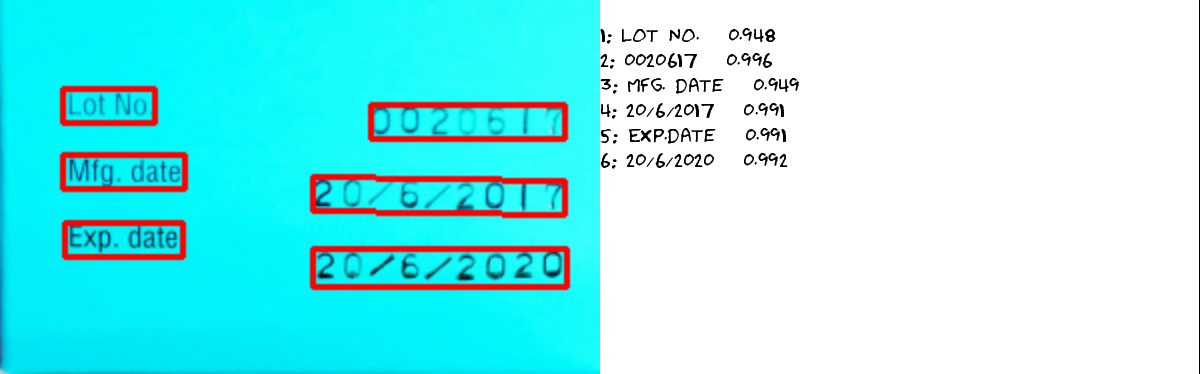

In [3]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab.patches import cv2_imshow
import cv2
from datetime import datetime

ocr = PaddleOCR(use_angle_cls=True, lang="en")

img_path = "/content/drive/MyDrive/yeditek/images/skt3.bmp"
img = cv2.imread(img_path)
#cv2_imshow(img)

result = ocr.ocr(img_path, cls=True)
#for line in result:
#  print(line)

boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

im_show = draw_ocr(img, boxes, txts, scores, font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf')
im_show = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)

cv2_imshow(im_show)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
expiry_date_str = txts[5]
print(expiry_date_str)
print(type(expiry_date_str))

20/6/2020
<class 'str'>


In [5]:
date_format = "%d/%m/%Y"
expiry_date = datetime.strptime(expiry_date_str, date_format)

#comparison_date_str = "20/05/2020" #"01/01/2021"
#comparison_date = datetime.strptime(comparison_date_str, date_format)
today_date_str = datetime.now().strftime(date_format)
today_date = datetime.strptime(today_date_str, date_format)

if expiry_date < today_date:
    print(f"Expiry Date: {expiry_date_str}\nToday: {today_date_str}\nThe product has expired.")
else:
    print(f"Expiry Date: {expiry_date_str}\nToday: {today_date_str}\nThe product has not expired.")

Expiry Date: 20/6/2020
Today: 13/09/2024
The product has expired.
